In [20]:
import pandas as pd

df = pd.read_csv("../Data/unstructured_data.csv")

#Look at the data
print(df.head())

#Print total number of feedbacks
print("Total feedbacks:", len(df))

#Look if data has missing values
print("Total null values:", df.isnull().sum())

                                    CustomerFeedback
0  Ugh. This product took forever to arrive... an...
1  Loved it! Great fit, fast delivery. Definitely...
2  The packaging was damaged when it arrived. I h...
3  why does the website keep crashing every time ...
4  Ordered two weeks ago and still no update. Wha...
Total feedbacks: 10
Total null values: CustomerFeedback    0
dtype: int64


In [21]:
#Dive in to the data
#Who mentioned something about 'delivery'
delivery_related = df[df['CustomerFeedback'].str.contains("delivery", case=False)]
print(delivery_related)

                                    CustomerFeedback
1  Loved it! Great fit, fast delivery. Definitely...


In [ ]:
#Who mentioned something about damage
damage_related = df[df['CustomerFeedback'].str.contains("damage", case=False)]
print(damage_related)

                                    CustomerFeedback
2  The packaging was damaged when it arrived. I h...


In [ ]:
#Find out how long the comments are
df['CommentLength'] = df['CustomerFeedback'].str.len()
print(df[['CustomerFeedback', 'CommentLength']])

                                    CustomerFeedback  CommentLength
0  Ugh. This product took forever to arrive... an...             88
1  Loved it! Great fit, fast delivery. Definitely...             64
2  The packaging was damaged when it arrived. I h...             87
3  why does the website keep crashing every time ...             74
4  Ordered two weeks ago and still no update. Wha...             59
5  Amazing quality and customer service. Even bet...             66
6  Meh. It's okay. Just not as good as the photos...             60
7  Live chat support said they’d escalate my issu...             71
8  My parcel was left outside in the rain. Everyt...             69
9  I’ve bought this three times now. You guys roc...             66


In [29]:
def tag_sentiment(text):
    if any(word in text.lower() for word in ['love','great','amazing','rock','helpful']):
        return 'Positive'
    elif any(word in text.lower() for word in ['ugly', 'damaged', 'annoyed', 'crash', 'return', 'soaked']):
        return 'Negative'
    else:
        return 'Neutral'
    
df['Sentiment'] = df['CustomerFeedback'].apply(tag_sentiment)
print(df[['CustomerFeedback', 'Sentiment']])

                                    CustomerFeedback Sentiment
0  Ugh. This product took forever to arrive... an...  Negative
1  Loved it! Great fit, fast delivery. Definitely...  Positive
2  The packaging was damaged when it arrived. I h...  Positive
3  why does the website keep crashing every time ...  Negative
4  Ordered two weeks ago and still no update. Wha...   Neutral
5  Amazing quality and customer service. Even bet...  Positive
6  Meh. It's okay. Just not as good as the photos...   Neutral
7  Live chat support said they’d escalate my issu...   Neutral
8  My parcel was left outside in the rain. Everyt...  Negative
9  I’ve bought this three times now. You guys roc...  Positive


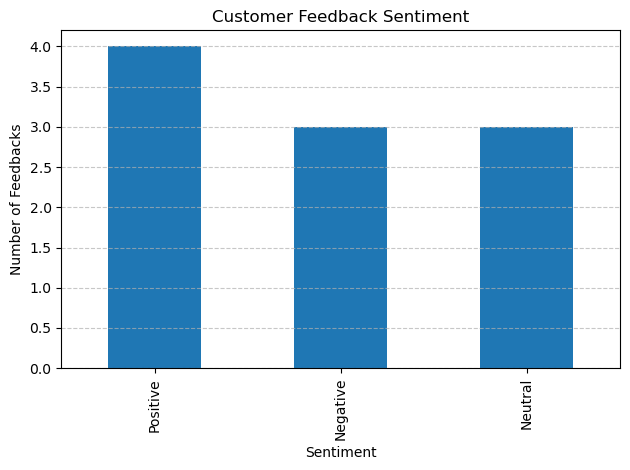

In [31]:
import matplotlib.pyplot as plt

#Count amounts of feedback in Positive, Negative and Neutral
sentiment_counts = df['Sentiment'].value_counts()

#Plot a bar-chart
sentiment_counts.plot(kind='bar', title='Customer Feedback Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Feedbacks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()